# Pregunta1



## **a.**

Clonar el repositorio de IPython : https://github.com/ipython/ipython

In [1]:
# Solucion
!git clone https://github.com/ipython/ipython.git

Cloning into 'ipython'...
remote: Enumerating objects: 193074, done.
remote: Counting objects: 100% (962/962), done.
remote: Compressing objects: 100% (253/253), done.
remote: Total 193074 (delta 838), reused 718 (delta 709), pack-reused 192112 (from 4)
Receiving objects: 100% (193074/193074), 79.42 MiB | 21.06 MiB/s, done.
Resolving deltas: 100% (144680/144680), done.


## **b.**

Obtener el historial de commits con el siguiente formato :

`nombre_del_autor,email_del_autor,fecha_del_autor,subject_del_commit `

Almacenar este historial de commits en la siguiente ruta :

`/content/repo/ipython_dic2025.txt`

In [18]:
# Solucion
import os
os.makedirs("/content/repo", exist_ok=True)
os.chdir("/content/ipython")

!git log --pretty=format:"%an,%ae,%ad,%s" > /content/repo/ipython_dic2025.txt

In [19]:
!head /content/repo/ipython_dic2025.txt

Michał Krassowski,5832902+krassowski@users.noreply.github.com,Mon Dec 22 09:39:33 2025 +0000,Fix completions for methods starting with `_` (#15106)
Darshan Poudel,pranishpoudel10@gmail.com,Sun Dec 21 21:56:15 2025 +0545,fix-test
Darshan Poudel,pranishpoudel10@gmail.com,Sun Dec 21 21:49:39 2025 +0545,add-end-to-end-test
Darshan Poudel,pranishpoudel10@gmail.com,Sat Dec 20 20:42:11 2025 +0545,fix-completions-for-private-attr
Michał Krassowski,5832902+krassowski@users.noreply.github.com,Sat Dec 20 11:12:31 2025 +0000,Add prompt_toolkit's unix_word_rubout to assignable commands for shortcuts (#15105)
Alen,alen@comfi.dev,Fri Dec 19 21:48:24 2025 +0400,Add prompt_toolkit's unix_word_rubout to assignable commands for shortcuts
M Bussonnier,bussonniermatthias@gmail.com,Fri Dec 19 09:03:04 2025 +0100,Enable pretty-printing for PEP-649 annotated functions (#15095)
Zachary Ware,zachary.ware@gmail.com,Thu Dec 18 22:29:56 2025 -0600,Just use a version check
M Bussonnier,bussonniermatthias@gmail.com,

## **c.**

Contar el numero de commits por autor y almacenalo en `/content/stats.txt`


In [24]:
# Solucion
!git shortlog -sne --all > /content/stats.txt # sne para que tenga los emails para la siguiente pregunta

In [25]:
!head /content/stats.txt

  6181	Benjamin Ragan-Kelley <benjaminrk@gmail.com>
  5216	Matthias Bussonnier <bussonniermatthias@gmail.com>
  3694	Thomas Kluyver <thomas@kluyver.me.uk>
  1900	Jonathan Frederic <jdfreder@calpoly.edu>
  1848	Fernando Perez <Fernando.Perez@berkeley.edu>
  1779	Brian E. Granger <ellisonbg@gmail.com>
   802	Ville M. Vainio <vivainio@gmail.com>
   741	M Bussonnier <bussonniermatthias@gmail.com>
   708	Paul Ivanov <pi@berkeley.edu>
   287	Evan Patterson <epatters@enthought.com>


## **d.**

Para este item se trabajara con `/content/stats.txt`

El siguiente objeto (imagen adjunta) de tipo pd.Series muestra las frecuencias para cada dominio de correo de los autores (por ejemplo, el dominio de correo gmail.com aparece un total de 539 veces). Muestra como realizar este calculo (Ten en cuenta que los resultados pueden variar con respecto a la imagen adjunta)

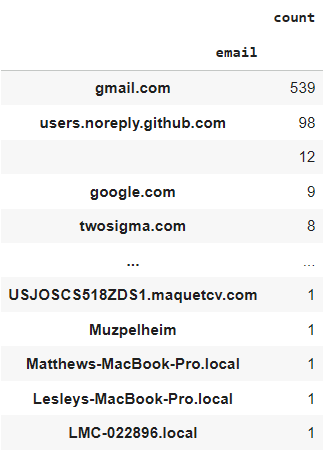

In [98]:
# Frecuencia por dominio de correo de los autores en stats.txt
import pandas as pd

# Leemos el txt y lo seteamos spliteado en elementos
elementos = []
with open('/content/stats.txt', 'r', encoding="utf-8") as f:
    for linea in f:
        elementos.append(linea.strip().split())
# print(elementos)

# Separamos la lista de interes (dominio (despues del @))
dominios = []
for elemento in elementos:
  dominios.append([elemento[-1].split('@')[-1]][0].split('<')[0].split('>')[0])
# print(dominios)

# # Armamos un df con los dominios y el conteo de cada dominio
s = pd.Series(dominios, name='email')
df = s.value_counts()
df

,count
email,
gmail.com,540
users.noreply.github.com,98
,14
google.com,9
twosigma.com,8
...,...
ungrund.org,1
ets.org,1
rhelmot.io,1


# Pregunta 2

Crea un repositorio publico en `github.com` de nombre `cap199_preg2_mod2`.
En este repositorio se deben realizar 4 push, uno para cada una de las soluciones (implementadas en python) de los siguientes items:

## **a.**

Visualiza la función $seno$ junto con varias rectas tangentes en diferentes puntos (`0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2`). El resultado debe ser practicamente al que a continuacion muestro.

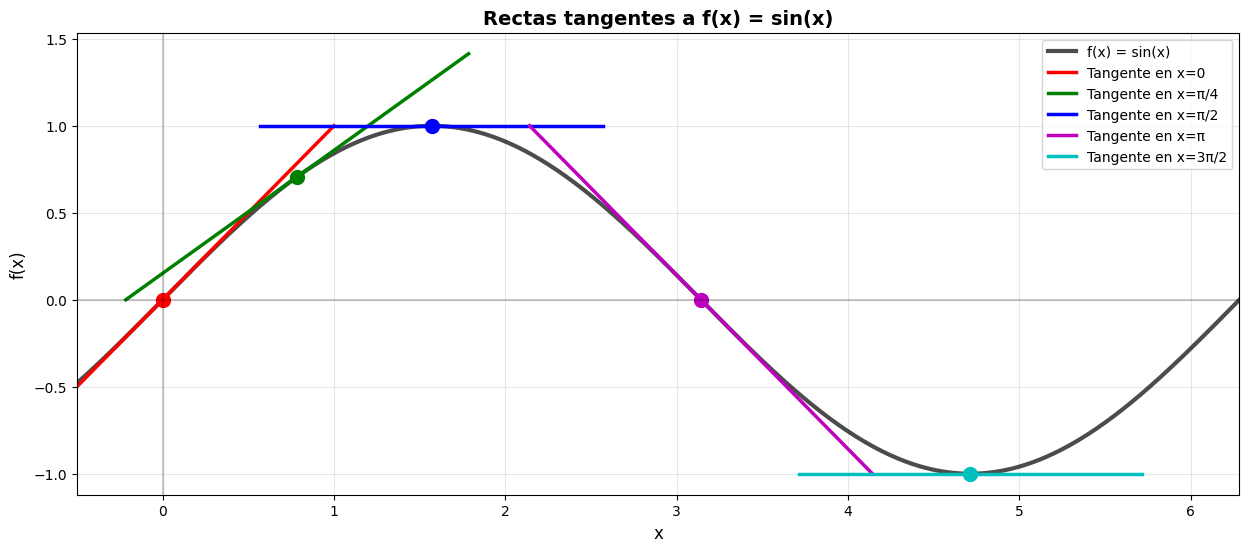

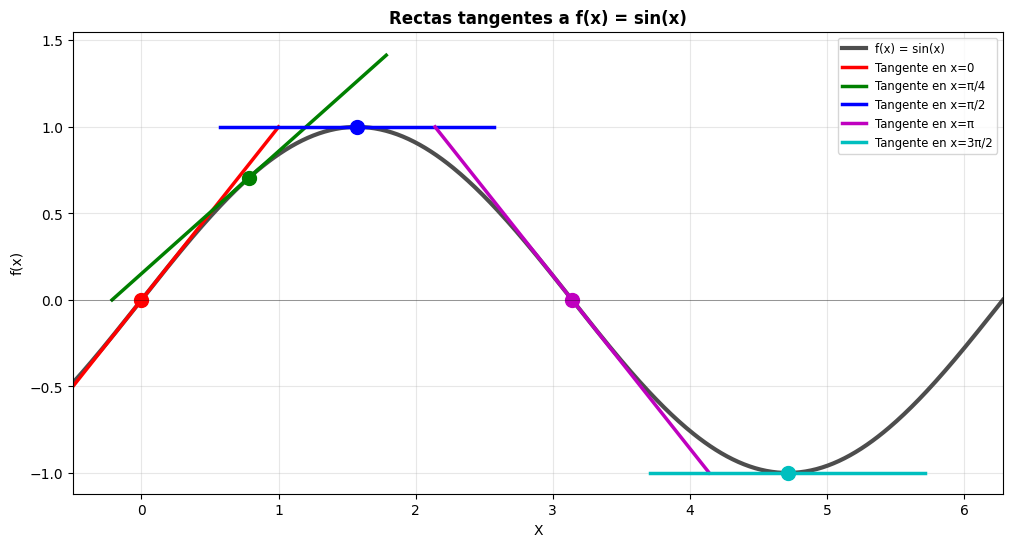

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Configuracion de datos
x = np.linspace(-0.5, 2 * np.pi, 500)
y = np.sin(x)
puntos_a = [0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2]
colores = ['r', 'g', 'b', 'm', 'c']
etiquetas = ['0', 'π/4', 'π/2', 'π', '3π/2']

# Creacion de la figura
plt.figure(figsize=(12, 6))

# Dibujar la funcion seno
plt.plot(x, y, color='#4d4d4d', linewidth=3, label='f(x) = sin(x)')

# Tangentes
for a, color, etiqueta in zip(puntos_a, colores, etiquetas):
    fa = np.sin(a)
    f_prima_a = np.cos(a)

    # Rangos
    x_tan = np.linspace(a - 1, a + 1, 10)
    y_tan = fa + f_prima_a * (x_tan - a)

    # Dibujar la recta
    plt.plot(x_tan, y_tan, color=color, linewidth=2.5, label=f'Tangente en x={etiqueta}')

    # Dibujar el punto de tangencia
    plt.plot(a, fa, marker='o', color=color, markersize=10)

# Grafico
plt.title('Rectas tangentes a f(x) = sin(x)', fontweight='bold')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.axhline(0, color='black', linewidth=0.5, alpha=0.5)
plt.grid(True, which='both', linestyle='-', alpha=0.3)
plt.xlim(-0.5, 2 * np.pi)
plt.ylim(-1.12, 1.55)
plt.legend(loc='upper right', fontsize='small')

plt.show()

## **b.**

Dataset : https://github.com/robintux/Datasets4StackOverFlowQuestions/blob/master/Cancer_Pulmon.zip

Cargar el dataset en memoria : Usar como nombre de variable : `df`



In [ ]:
# Solucion
import pandas as pd
!wget https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/Cancer_Pulmon.zip
!unzip Cancer_Pulmon.zip

df = pd.read_csv('Cancer_Pulmon.csv')

In [ ]:
df.info()

## **c.**

Con la variable `df` del item **b.** genere el siguiente grafico:

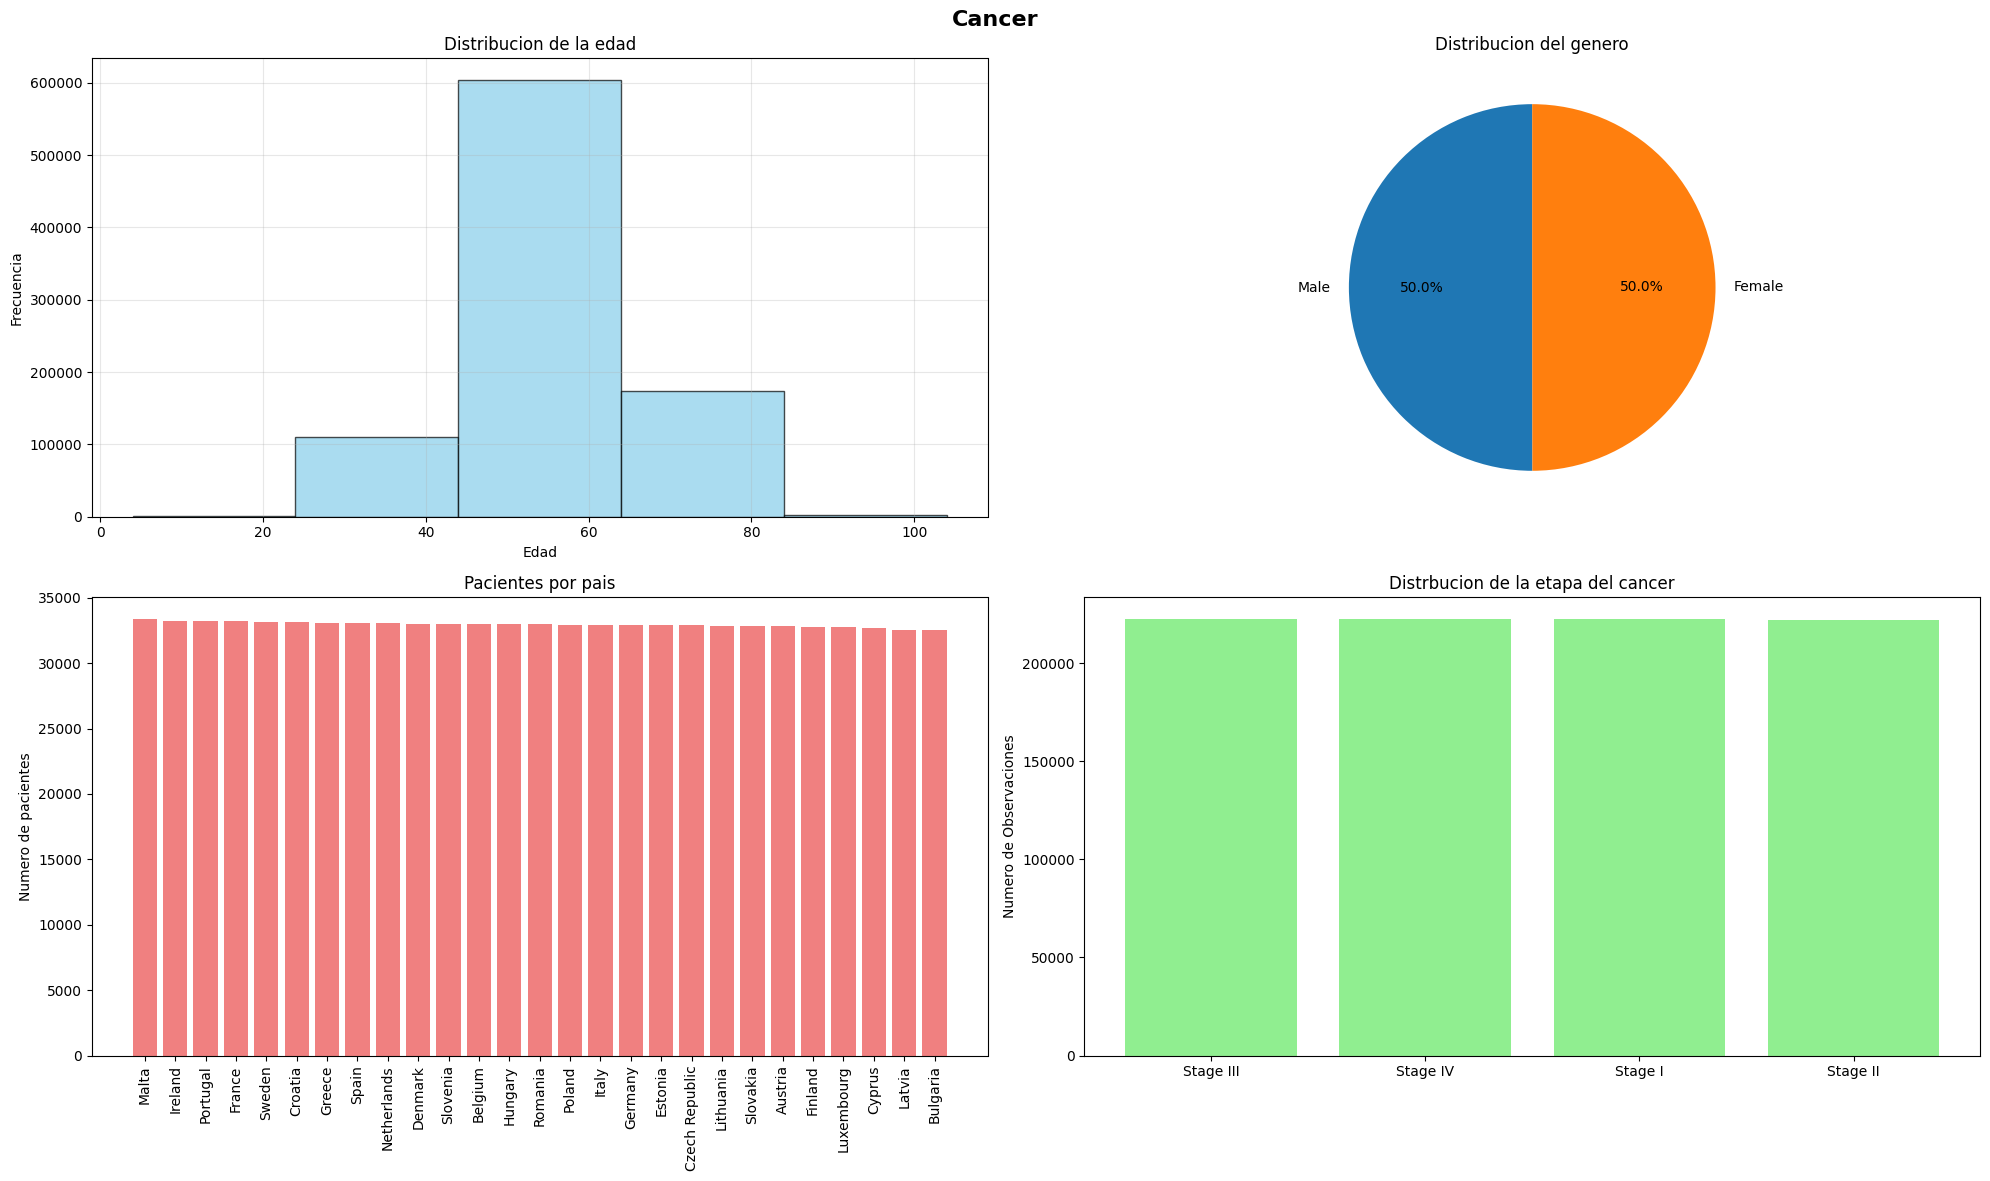

In [ ]:
# Solucion

import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Cancer', fontsize=16, fontweight='bold')

# Histograma de la columna/variable : age


# Diagrama de tipo pie de la variable/columna : gender


# Distribucion de paises (Columna : country) en un diagrama de barras


# Distribucion de la etapa del cancer (columna cancer_stage)  en un diagrama de barras.



## **d.**

Con la variable `df` del item **b.** genere un boxplot para cada una de las siguientes variables:

* `age`
* `bmi`
* `cholesterol_level`

In [ ]:
# Solucion